# ENPH 213 - Week 9 Lab - Part 5

In this lab, we will be working on numerically solving ordinary differential equations and continuing to develop your Python skills.

When you are finished, please rename this notebook to LastName_ENPH213_Lab9-Part5, where LastName is your last name.  Submit that file to onQ.

For marking Parts 1-4 will be marked together (Weighted out of 10) and Part 5 will be marked out of 5.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Part 5

The Schroedinger equation for a particle in a box reduces to a relatively simple differential equation.

$\Large \frac{d^2 \phi}{dx^2} = (V-E) \phi$

Where the right hand side is simply a constant times $\phi$.  Note that for simplicity, I'm going to choose units such that $\hbar^2/2m = 1$.

There are 3 regions of interest, the quantum well that extends from $-L < x < L$ where the potential $V = 0$, and the regions $x \leq L$ and $x \geq L$ where $V = V$.  The difficulty is at the boundary where the values for $\phi(x)$ and $\phi^\prime(x)$ should be continuous.  With these three regions, the process to solve the provlem is to do each region separately and match them together.

We will this problem using the 2nd Order Central Difference solver discussed in class and used previously.  Note that with 2nd order ODEs, you need 2 initial conditions to get started. However, we do not know E, which will be solved for interatively. 

Use the following parameters in you solution. Use 1000 points stretching from -10 to 10.  The quantum well (where V = 0) will occupy from $-2 < x < 2$.  Outside of this region, the potential $ V = 30 $.

To start, run the algorithm from -10 to -2.  You will need 2 points to start so set the first two points of $\phi$ to be $\phi[0] = \phi[1] = 0.00001$. 

In the second step, run the algortithm backwards from 10 to 2 (in the right hand barrier).  Again, you will need 2 points to start so set the last two points of $\phi$ to be $\phi[-1] = \phi[-2] = 0.00001$.

The value for $E$ isn't critical in the barrier regions as it is much smaller than V.  You can set it to something small ($E=1$) for now.

To check your progress to this point, you should have exponentially decaying curves from 2 to 10 on either side.

For the middle, quantum well region, the result is only dependent on $E$ and is in fact negative because $V=0$.  Again you can use the 2nd Order Central difference solver.  This time, you can take the first 2 point to be the last 2 points of the first region below $x = -2$.  This will enforce continuity of the function and the slope.

The solution in the middle section is an oscillation.  The value of the ground state has $0 < E < 1$.  So, you need to guess a value for E, run the ODE solver, and then assess whether the value should of $E$ should be increased or decreased.  The assessment is whether the last point of the middle section is within a limit of the value at $x=2$ from the right hand barrier calculation.  This forces continuity of $\phi$.  $\phi^\prime$ is not necessarily continuous, but we will neglect that condition for simplicity.

For the iteration and assessment for $E$, I recommend using steps in $E$ of $\pm 0.0001$, and that $\frac{\phi(2) - \phi(2+h)}{ \phi(2+h)} < 0.001$, where $h$ is the distance between 2 points and $\phi(2+h)$ is the last point calcuted in the second step (right hand barrier).

Now that you have the ground state energy calculated (print this result), plot the result, which should show a central peak and a wave function exponentially decaying into the barriers.  Also, plot $\phi^2(x)$, which is the expectation value within the quantum well.

This is for the first energy level of the quantum well, $n=1$.  Solve the solution 4 more times for $n = 2, 3, 4, 5$.  For your initial guesses, remember than quantum well energies of excited states are $E(n) = n^2 E(1)$.  (Note that for $n=2, 4$, the middle section will end up negative.  To remedy this, make the points in the right hand barrier negative.)  Print the energies of these levels as well as the graphs for $\phi(x)$ and $\phi^2(x)$.

Finally, run your code with an initial guess of $E = 40$. Plot the result.  **Question:  Is this result consistent with the physics of the situation?**

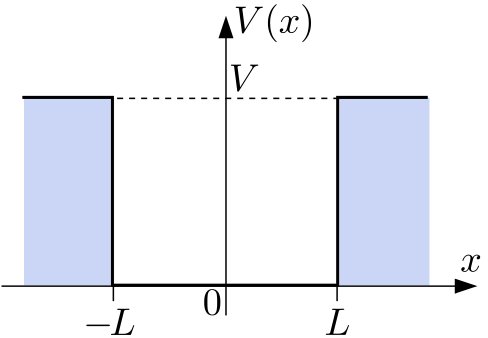

In [176]:
def Schroed(phi,V,E): #defining the schroedinger equation
    return (V-E)*phi

def ODESolve(Phi_0,Phi_1,R,N,V,E,f): #function takes 2 initial conditions, a range, number of points, V and E and a function
    h = (R[-1]-R[0])/(N-1)
    Phi = np.zeros(N)
    if(R[-1] >= 0): #checks if it needs to solve it backwards or forwards
        Phi[0] = Phi_0
        Phi[1] = Phi_1 #creating phi array and implementing initial conditions

        for i in range(1,N-1):
            Phi[i+1] = h**2 * f(Phi[i],V,E) - Phi[i-1] + 2*Phi[i]
    
    if(R[-1] < 0): #similar to forward solving with some indexing changes
        Phi[-1] = Phi_0
        Phi[-2] = Phi_1 #creating phi array and implementing initial conditions

        for i in range(N-2,0,-1):
            Phi[i-1] = h**2 * f(Phi[i],V,E) - Phi[i+1] + 2*Phi[i]
        
    return Phi #returns the Phi array

def E(I_0,I_1,Guess, Edge, R, N, V):
    Mid = ODESolve(I_0, I_1, R, N, V, Guess, Schroed) #using the above function with the guess for E
    while((((Mid[-1])-Edge)/Edge) > 0.001): #condition for threshold
        Guess += 0.0001 #iterates through adding 0.0001 to the guess everytime until its within the threshold
        Mid = ODESolve(I_0, I_1, R, N, V, Guess, Schroed)
        
    E = Guess 
    return E

#functions needed are now defined

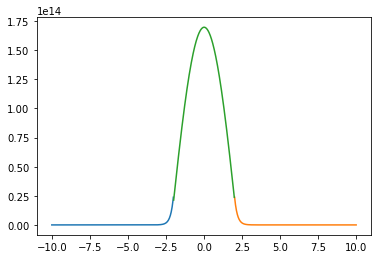

In [177]:
x = np.linspace(-10,10,1000) #defining the total range
RS = ODESolve(0.00001,0.00001,[-10,-2], 400, 30, 1, Schroed) #this creates the left side past the well
LS = ODESolve(0.00001,0.00001, [10,2], 400, 30, 1, Schroed) #this creates the right side past the well

E1 = E(LS[-2], LS[-1], 0.0001 , RS[0], [-2,2], 200, 0) #finding E with the initial conditions from the above solved equations

MS = ODESolve(LS[-2],LS[-1], [-2,2], 200, 0, E1, Schroed) #Mid section being solved with 0 potential and the E found above

plt.plot(x[:400],LS)
plt.plot(x[600:],RS)
plt.plot(x[400:600],MS)

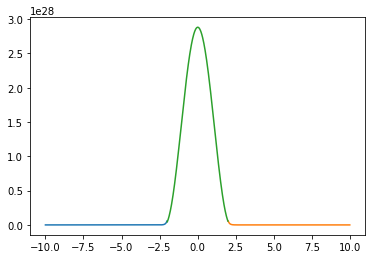

In [178]:
plt.plot(x[:400],LS**2)
plt.plot(x[600:],RS**2)
plt.plot(x[400:600],MS**2)

## Acknowledgements

Please comment on any help that you received from your group members or others concerning this Lab assignment.